In [5]:
import os
import pandas as pd
%matplotlib inline
from newsapi.newsapi_client import NewsApiClient
from dotenv import load_dotenv

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [8]:
# Read your api key environment variable
load_dotenv()



True

In [9]:
# Create a newsapi client
newsapi=NewsApiClient(api_key=os.environ['news_api'])


In [12]:
# Fetch the Bitcoin news articles
bitcoin_articles=newsapi.get_everything(q='bitcoin', language='en', sort_by='relevancy')


In [13]:
# Fetch the Ethereum news articles
ethereum_articles=newsapi.get_everything(q='ethereum', language='en', sort_by='relevancy')


In [14]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.000,1.000,0.000,The Winklevoss twinsthe brothers Mark Zuckerbe...
1,0.0000,0.000,1.000,0.000,"Sparrow Exchange, a Bitcoin and Ethereum optio..."
2,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...
3,-0.2755,0.070,0.930,0.000,Reuters\r\n<ul><li>Goldman Sachs gave five rea...
4,0.0000,0.000,1.000,0.000,<ul><li>Famed investor Michael Novogratz tweet...


In [15]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.0,1.000,0.000,"Sparrow Exchange, a Bitcoin and Ethereum optio..."
1,0.0000,0.0,1.000,0.000,Editor’s note:Andreessen HorowitzsCrypto Start...
2,0.5070,0.0,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...
3,0.0000,0.0,1.000,0.000,For developers looking to quickly build identi...
4,0.5574,0.0,0.863,0.137,"Introducing Web3Torrent\r\nJune 18, 2020\r\nTo..."


In [16]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()


,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.323805,0.010200,0.924450,0.065300
std,0.298909,0.033067,0.044072,0.039891
min,-0.346400,0.000000,0.819000,0.000000
25%,0.000000,0.000000,0.910000,0.034500
50%,0.507000,0.000000,0.910000,0.090000
75%,0.507000,0.000000,0.915000,0.090000
max,0.507000,0.134000,1.000000,0.090000


In [17]:
# Describe the Ethereum Sentiment
ethereum_df.describe()


,Compound,Negative,Neutral,Positive
count,15.000000,15.000000,15.000000,15.000000
mean,0.147640,0.030867,0.908733,0.060333
std,0.442792,0.059707,0.072074,0.053772
min,-0.670500,0.000000,0.751000,0.000000
25%,0.000000,0.000000,0.862000,0.000000
50%,0.273200,0.000000,0.910000,0.065000
75%,0.507000,0.025000,0.971500,0.090000
max,0.731600,0.184000,1.000000,0.166000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score.

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score.

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [18]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [19]:
# Expand the default stopwords list if necessary
lemmatizer = WordNetLemmatizer()


In [20]:
# Complete the tokenizer function
def tokenizer(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens
    


In [22]:
# Create a new tokens column for bitcoin
bitcoin_tokens=[]
for article_text in bitcoin_df['text']:
    article_tokens= tokenizer(article_text)
    bitcoin_tokens.append(article_tokens)

bitcoin_df['tokens']=bitcoin_tokens
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0000,0.000,1.000,0.000,The Winklevoss twinsthe brothers Mark Zuckerbe...,"[winklevoss, twinsthe, brother, mark, zuckerbe..."
1,0.0000,0.000,1.000,0.000,"Sparrow Exchange, a Bitcoin and Ethereum optio...","[sparrow, exchange, bitcoin, ethereum, option,..."
2,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...,"[youre, planning, protesting, dont, want, risk..."
3,-0.2755,0.070,0.930,0.000,Reuters\r\n<ul><li>Goldman Sachs gave five rea...,"[reutersulligoldman, sachs, gave, five, reason..."
4,0.0000,0.000,1.000,0.000,<ul><li>Famed investor Michael Novogratz tweet...,"[ullifamed, investor, michael, novogratz, twee..."


In [24]:
# Create a new tokens column for ethereum
ethereum_tokens=[]
for article_text in ethereum_df['text']:
    article_tokens= tokenizer(article_text)
    ethereum_tokens.append(article_tokens)
ethereum_df['tokens']=ethereum_tokens
ethereum_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0000,0.0,1.000,0.000,"Sparrow Exchange, a Bitcoin and Ethereum optio...","[sparrow, exchange, bitcoin, ethereum, option,..."
1,0.0000,0.0,1.000,0.000,Editor’s note:Andreessen HorowitzsCrypto Start...,"[editors, noteandreessen, horowitzscrypto, sta..."
2,0.5070,0.0,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
3,0.0000,0.0,1.000,0.000,For developers looking to quickly build identi...,"[developer, looking, quickly, build, identity,..."
4,0.5574,0.0,0.863,0.137,"Introducing Web3Torrent\r\nJune 18, 2020\r\nTo...","[introducing, webtorrentjune, today, excited, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [26]:
from collections import Counter
from nltk import ngrams

In [27]:
# Generate the Bitcoin N-grams where N=2
btc_flat_list = []
for sublist in bitcoin_tokens:
    for item in sublist:
        btc_flat_list.append(item)

bigram_counts_btc = Counter(ngrams(btc_flat_list, n=2))
dict(bigram_counts_btc.most_common(23))

{('satoshi', 'nakaboto'): 28,
 ('char', 'robot'): 14,
 ('robot', 'colleague'): 14,
 ('colleague', 'satoshi'): 14,
 ('nakaboto', 'writes'): 14,
 ('writes', 'bitcoin'): 14,
 ('every', 'fucking'): 14,
 ('fucking', 'daywelcome'): 14,
 ('daywelcome', 'another'): 14,
 ('another', 'edition'): 14,
 ('edition', 'bitcoin'): 14,
 ('bitcoin', 'today'): 14,
 ('today', 'satoshi'): 14,
 ('nakaboto', 'tell'): 14,
 ('tell', 'whats'): 14,
 ('whats', 'going'): 14,
 ('going', 'bitcoin'): 14,
 ('bitcoin', 'char'): 14,
 ('bitcoin', 'btc'): 13,
 ('btc', 'every'): 13,
 ('winklevoss', 'twinsthe'): 1,
 ('twinsthe', 'brother'): 1,
 ('brother', 'mark'): 1}

In [28]:
# Generate the Ethereum N-grams where N=2
eth_flat_list = []
for sublist in ethereum_tokens:
    for item in sublist:
        eth_flat_list.append(item)

bigram_counts_eth = Counter(ngrams(eth_flat_list, n=2))
dict(bigram_counts_eth.most_common(23))

{('satoshi', 'nakaboto'): 8,
 ('bitcoin', 'char'): 5,
 ('char', 'robot'): 4,
 ('robot', 'colleague'): 4,
 ('colleague', 'satoshi'): 4,
 ('nakaboto', 'writes'): 4,
 ('writes', 'bitcoin'): 4,
 ('bitcoin', 'btc'): 4,
 ('btc', 'every'): 4,
 ('every', 'fucking'): 4,
 ('fucking', 'daywelcome'): 4,
 ('daywelcome', 'another'): 4,
 ('another', 'edition'): 4,
 ('edition', 'bitcoin'): 4,
 ('bitcoin', 'today'): 4,
 ('today', 'satoshi'): 4,
 ('nakaboto', 'tell'): 4,
 ('tell', 'whats'): 4,
 ('whats', 'going'): 4,
 ('going', 'bitcoin'): 4,
 ('open', 'source'): 2,
 ('sparrow', 'exchange'): 1,
 ('exchange', 'bitcoin'): 1}

In [29]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [30]:
# Get the top 10 words for Bitcoin
btc_counts=Counter(ngrams(btc_flat_list, n=1))
btc_counts.most_common(10)

[(('bitcoin',), 47),
 (('satoshi',), 28),
 (('nakaboto',), 28),
 (('char',), 20),
 (('today',), 15),
 (('robot',), 14),
 (('colleague',), 14),
 (('writes',), 14),
 (('every',), 14),
 (('fucking',), 14)]

In [31]:
# Get the top 10 words for Ethereum
eth_counts=Counter(ngrams(eth_flat_list, n=1))
eth_counts.most_common(10)

[(('bitcoin',), 15),
 (('char',), 15),
 (('satoshi',), 8),
 (('nakaboto',), 8),
 (('today',), 7),
 (('robot',), 4),
 (('colleague',), 4),
 (('writes',), 4),
 (('btc',), 4),
 (('every',), 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

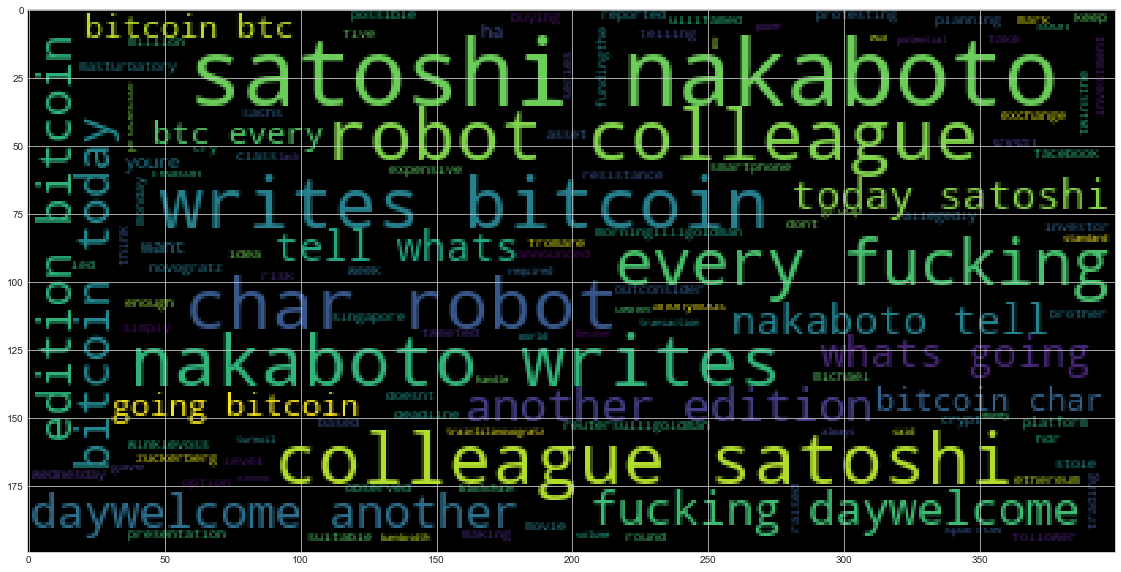

In [33]:
# Generate the Bitcoin word cloud
btc_string = ' '.join([str(elem) for elem in btc_flat_list]) 
wc = WordCloud().generate(btc_string)
plt.imshow(wc)

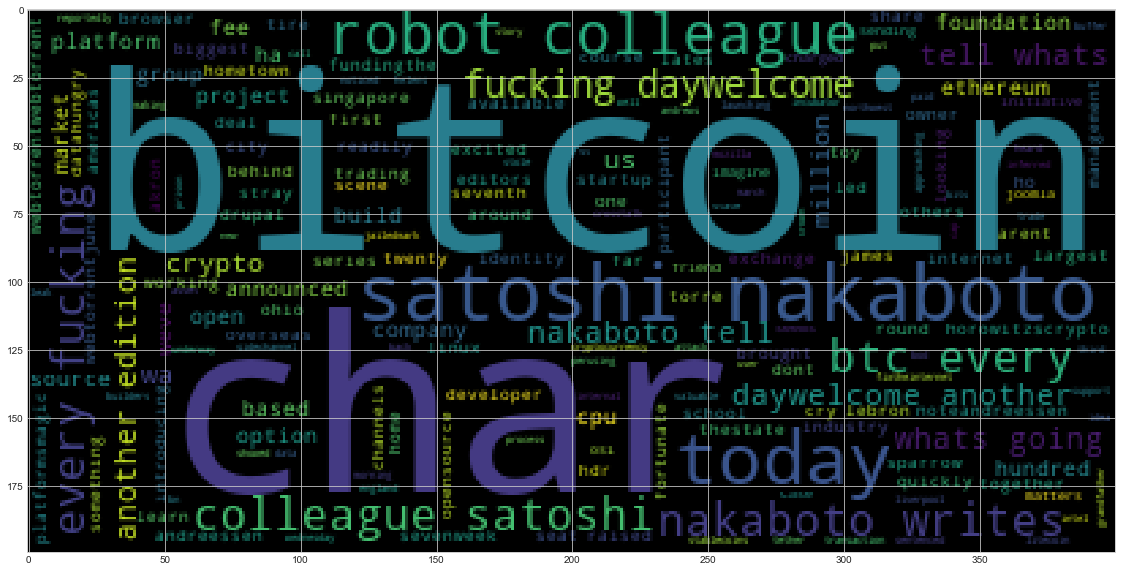

In [34]:
# Generate the Ethereum word cloud
eth_string = ' '.join([str(elem) for elem in eth_flat_list]) 
wc = WordCloud().generate(eth_string)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [44]:
import spacy
from spacy import displacy

In [45]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [46]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [47]:
# Concatenate all of the bitcoin text together
btc_concat = ' '.join(bitcoin_df["text"])



In [48]:
# Run the NER processor on all of the text
doc=nlp(btc_concat)
displacy.render(doc, style='ent')
# Add a title to the document

In [32]:
# Render the visualization


In [49]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Mark Zuckerberg PERSON
Facebook ORG
Deadline PERSON
this week DATE
+2657 ORG
Sparrow Exchange ORG
Bitcoin GPE
Singapore GPE
today DATE
$3.5 million MONEY
HDR Group ORG
Reuters
 ORG
Goldman Sachs ORG
five CARDINAL
bitcoin GPE
Wednesday DATE
Goldman ORG
Michael Novogratz PERSON
Monday DATE
bitcoin GPE
$10,000 resistance MONEY
Novogratz PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Bitcoin PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
S

---

## Ethereum NER

In [34]:
# Concatenate all of the bitcoin text together


'President Trump tweeted insults at Twitter again this morning, but this time Jack took the conversation off platform to the White House. In other news, a controversial Census question creates some strange bedfellows, and a "blockchain bandit" is pilfering mil… [+1705 chars]After announcing that they were launching a managed blockchain service late last year, Amazon Web Services is now opening that service up for general availability.\r\nIt was only about five months ago that AWS chief executive Andy Jassy announced that the compa… [+1220 chars]Captain Kirk and neo-Dadaists. Repugnant markets and legendary cryptographers. “Digital couture” auctioned by CryptoKitties developers. Distributed autonomous art organizations. A keynote speech looking back from 2047 at the near-apocalypse of 2026, from whic… [+5265 chars]So long as cryptocurrency exists, so too will the extraordinarylengths to which thieves will go to try to steal it. Unfortunately, that also includes preying on weak private k

In [35]:
# Run the NER processor on all of the text

# Add a title to the document

In [36]:
# Render the visualization

In [37]:
# List all Entities

Trump PERSON
Twitter GPE
this morning TIME
Jack PERSON
the White House ORG
late last year DATE
Amazon Web Services ORG
only about five months ago DATE
Andy Jassy PERSON
Kirk PERSON
neo-Dadaists NORP
Digital ORG
CryptoKitties ORG
2047 DATE
2026 DATE
one CARDINAL
millions CARDINAL
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
Ether PERSON
ETH ORG
ETH ORG
Vitalik Buterin PERSON
Twitter GPE
Ethereum GPE
early this morning TIME
April 30 DATE
201 CARDINAL
chars]Have PERSON
first ORDINAL
SEC ORG
CoinDesk Korea GPE
over $6.1 million MONEY
Ethereum GPE
Independent Security Evaluators ORG
ISE ORG
ETH ORG
just 7 percent PERCENT
a third CARDINAL
Chainanalysis GPE
chars]Cisco CVE-2019-1804 PERSON
Cisco GPE
9000 PRODUCT
Cisco PERSON
hundreds of millions CARDINAL
Ion ORG
Airbnb PERSON
Facebook PERSON
TRON ORG
TRON ORG
Opera ORG
millions of dollars MONEY
Ethereum GPE
Morgan PERSON
Microsoft ORG
Jane Connolly PERSON
Quorum   PERSON
Ethereum GPE
f